<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ANN_Unit4_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from minisom import MiniSom

# Set a random seed for reproducibility
np.random.seed(42)

# =================================================================
# PART 1: Data Generation
# =================================================================

# Generate the make_circles dataset (unlabeled for SOM training)
X, y = make_circles(n_samples=400, noise=0.05, factor=0.5)

# Scale the data (Min-Max scaling to [0, 1])
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# =================================================================
# PART 2: Self-Organizing Map (SOM) Training
# =================================================================

# SOM Hyperparameters
map_size = 15       # 15x15 map grid
input_len = X_scaled.shape[1] # Number of features (2)
sigma = 1.0         # Neighborhood radius
learning_rate = 0.5
num_iterations = 5000

# Initialize the MiniSom
som = MiniSom(map_size, map_size, input_len,
              sigma=sigma, learning_rate=learning_rate,
              random_seed=42)

# Initialize weights using PCA for faster convergence
som.pca_weights_init(X_scaled)

# Train the SOM
som.train_random(X_scaled, num_iterations, verbose=True)

# =================================================================
# PART 3: Visualization and Analysis
# =================================================================

plt.figure(figsize=(12, 12))

# Visualize the U-Matrix (Unified Distance Matrix)
# High values (bright colors) indicate boundaries between clusters
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# Define markers and colors for visualization (using original labels 'y')
marker = ['o', 's']
colors = ['r', 'g']

# Map the data points (Best Matching Units - BMUs) to the grid
for i, x in enumerate(X_scaled):
    w = som.winner(x) # Get the BMU for the data point
    # Plot the point at the center of the BMU cell
    plt.plot(w[0] + .5, w[1] + .5,
             marker=marker[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=7,
             markeredgewidth=2)

plt.title('Self-Organizing Map (SOM) on make_circles Data')
plt.xticks([])
plt.yticks([])
plt.show()

ModuleNotFoundError: No module named 'minisom'

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=a76d9f7953c8fe44e1102ca37e9fcddcc0a2dea833d9f9579bec62584d75be1a
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


/usr/local/lib/python3.12/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.01954361191359033


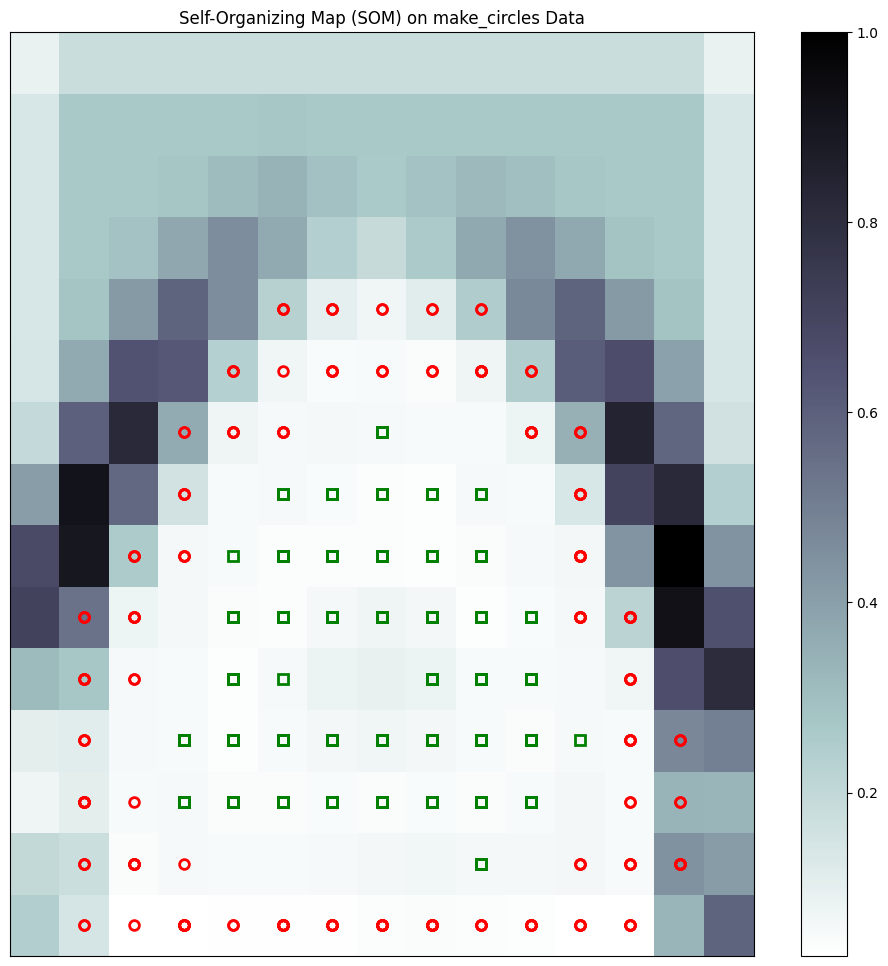

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from minisom import MiniSom

# Set a random seed for reproducibility
np.random.seed(42)

# =================================================================
# PART 1: Data Generation
# =================================================================

# Generate the make_circles dataset (unlabeled for SOM training)
X, y = make_circles(n_samples=400, noise=0.05, factor=0.5)

# Scale the data (Min-Max scaling to [0, 1])
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# =================================================================
# PART 2: Self-Organizing Map (SOM) Training
# =================================================================

# SOM Hyperparameters
map_size = 15       # 15x15 map grid
input_len = X_scaled.shape[1] # Number of features (2)
sigma = 1.0         # Neighborhood radius
learning_rate = 0.5
num_iterations = 5000

# Initialize the MiniSom
som = MiniSom(map_size, map_size, input_len,
              sigma=sigma, learning_rate=learning_rate,
              random_seed=42)

# Initialize weights using PCA for faster convergence
som.pca_weights_init(X_scaled)

# Train the SOM
som.train_random(X_scaled, num_iterations, verbose=True)

# =================================================================
# PART 3: Visualization and Analysis
# =================================================================

plt.figure(figsize=(12, 12))

# Visualize the U-Matrix (Unified Distance Matrix)
# High values (bright colors) indicate boundaries between clusters
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# Define markers and colors for visualization (using original labels 'y')
marker = ['o', 's']
colors = ['r', 'g']

# Map the data points (Best Matching Units - BMUs) to the grid
for i, x in enumerate(X_scaled):
    w = som.winner(x) # Get the BMU for the data point
    # Plot the point at the center of the BMU cell
    plt.plot(w[0] + .5, w[1] + .5,
             marker=marker[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=7,
             markeredgewidth=2)

plt.title('Self-Organizing Map (SOM) on make_circles Data')
plt.xticks([])
plt.yticks([])
plt.show()